# Supplementary Figure 7: Differentially detected epitopes heatmap

In Supplementary Figure 7, we show an overview of all of the epitopes measured in our ADTs and their differential detection results as a heatmap.

Differential epitope detection was computed using linear models in `05-adt-lm-testing/`.

## Load packages

hise: The Human Immune System Explorer R SDK package  
purrr: Functional programming tools  
dplyr: Dataframe handling functions  
ggplot2: plotting functions  
cowplot: multi-panel plot assembly

In [1]:
quiet_library <- function(...) { suppressPackageStartupMessages(library(...)) }
quiet_library(hise)
quiet_library(purrr)
quiet_library(dplyr)
quiet_library(ggplot2)
quiet_library(cowplot)

In [2]:
out_dir <- "output/supp_figure_07"
if(!dir.exists(out_dir)) { dir.create(out_dir, recursive = TRUE) }

## Retrieve files

Now, we'll use the HISE SDK package to retrieve the analysis results for DDE tests.

In [3]:
dde_uuid <- list("4cbaa9ab-f8ef-495d-ac5e-1f1d99d33e33")

In [4]:
dde_fres <- cacheFiles(dde_uuid)
dde_file <- list.files(
    paste0("cache/",dde_uuid),
    recursive = TRUE, full.names = TRUE
)

submitting request as query ID first...

retrieving files using fileIDS...



In [5]:
type_colors <- read.csv("../common/color_sets/aifi_cell_type_colors.csv")

In [6]:
feat_order <- read.csv("../common/adt_features.csv") %>%
  mutate(plot_label = paste(feature_label, "|", gene))

## Generate heatmaps

In [7]:
all_dde <- read.csv(dde_file)

### Bortezomib

In [8]:
treat <- "bortezomib"
treat_dde <- all_dde %>%
  filter(fg == treat)

In [9]:
plot_data <- treat_dde %>%
  left_join(feat_order) %>%
  left_join(type_colors) %>%
  mutate(logFC = case_when(
      logFC > 1.5 ~ 1.5,
      logFC < -1.5 ~ -1.5,
      TRUE ~ logFC
  ))
sig_data <- plot_data %>%
  filter(adjP < 0.01)

Joining with `by = join_by(feature)`
Joining with `by = join_by(aifi_cell_type)`


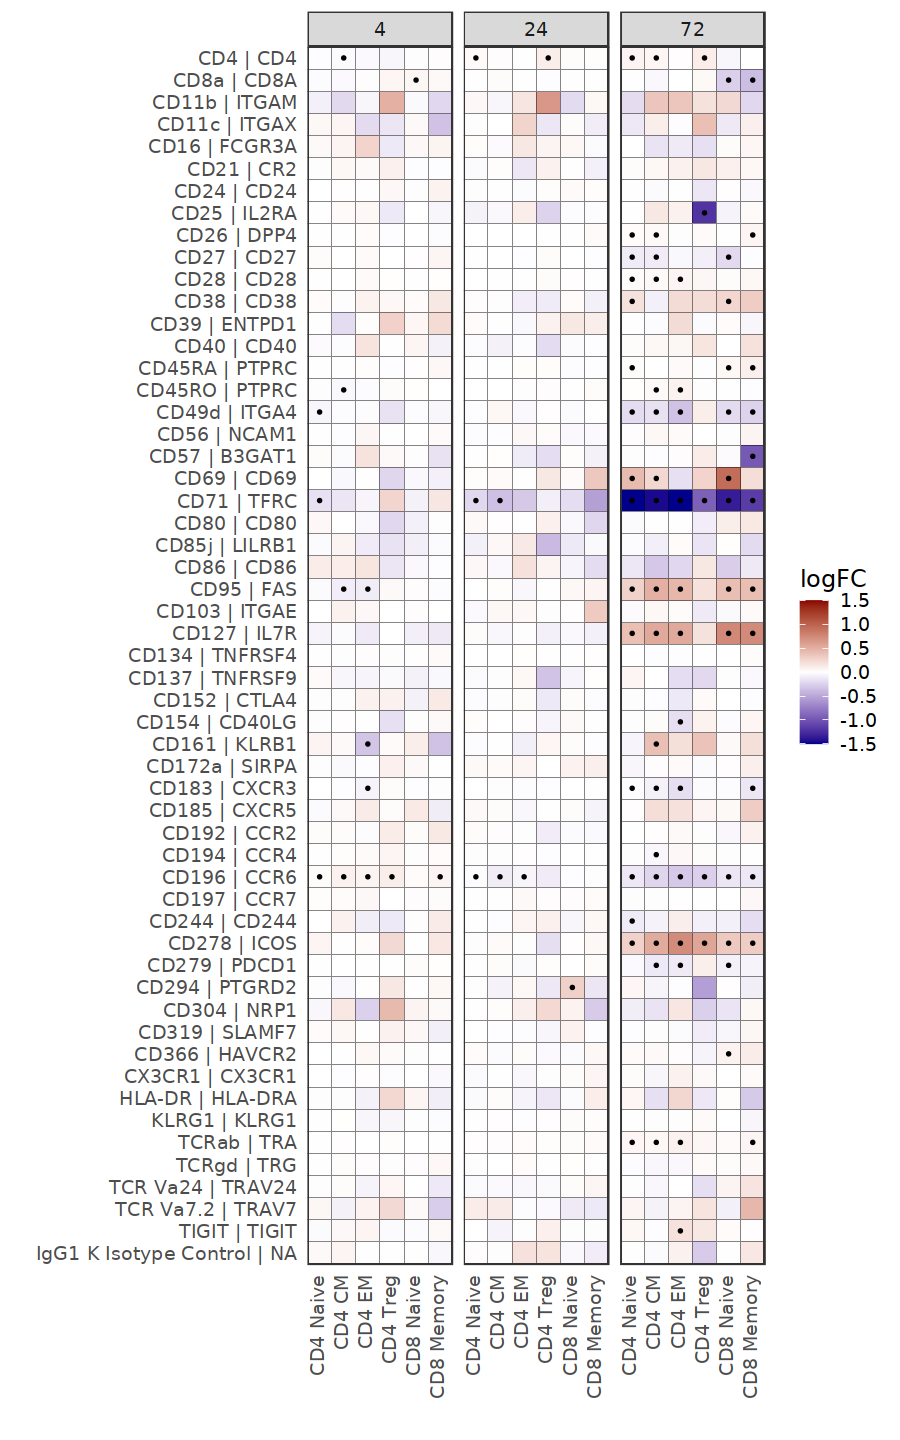

In [10]:
options(repr.plot.width = 7.5, repr.plot.height = 12)
bor_heatmap <- ggplot() +
  geom_tile(
      data = plot_data,
      aes(x = cell_type_xpos,
          y = ypos,
          fill = logFC),
      color = "black"
  ) +
  geom_point(
      data = sig_data,
      aes(x = cell_type_xpos,
          y = ypos),
      size = 0.5
  ) +
  facet_wrap(
      ~ timepoint
  ) +
  scale_x_continuous(
      "",
      breaks = type_colors$cell_type_xpos,
      label = type_colors$cell_type_label,
      expand = c(0,0)
  ) +
  scale_y_continuous(
      "",
      breaks = feat_order$ypos,
      labels = feat_order$plot_label,
      expand = c(0,0)
  ) +
  scale_fill_gradient2(
      low = "darkblue",
      mid = "white",
      high = "darkred",
      midpoint = 0,
      limits = c(-1.5, 1.5)
  ) +
  theme_bw(14) +
  theme(
      axis.ticks = element_blank(),
      axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3)
  )
bor_heatmap

In [11]:
bor_file <- file.path(out_dir, paste0("bor_dde_heatmap_", Sys.Date(), ".pdf"))

ggsave(
    bor_file,
    bor_heatmap,
    width = 7.5, height = 12
)

### Lenalidomide

In [12]:
treat <- "lenalidomide"
treat_dde <- all_dde %>%
  filter(fg == treat)

In [13]:
plot_data <- treat_dde %>%
  left_join(feat_order) %>%
  left_join(type_colors) %>%
  mutate(logFC = case_when(
      logFC > 1.5 ~ 1.5,
      logFC < -1.5 ~ -1.5,
      TRUE ~ logFC
  ))
sig_data <- plot_data %>%
  filter(adjP < 0.01)

Joining with `by = join_by(feature)`
Joining with `by = join_by(aifi_cell_type)`


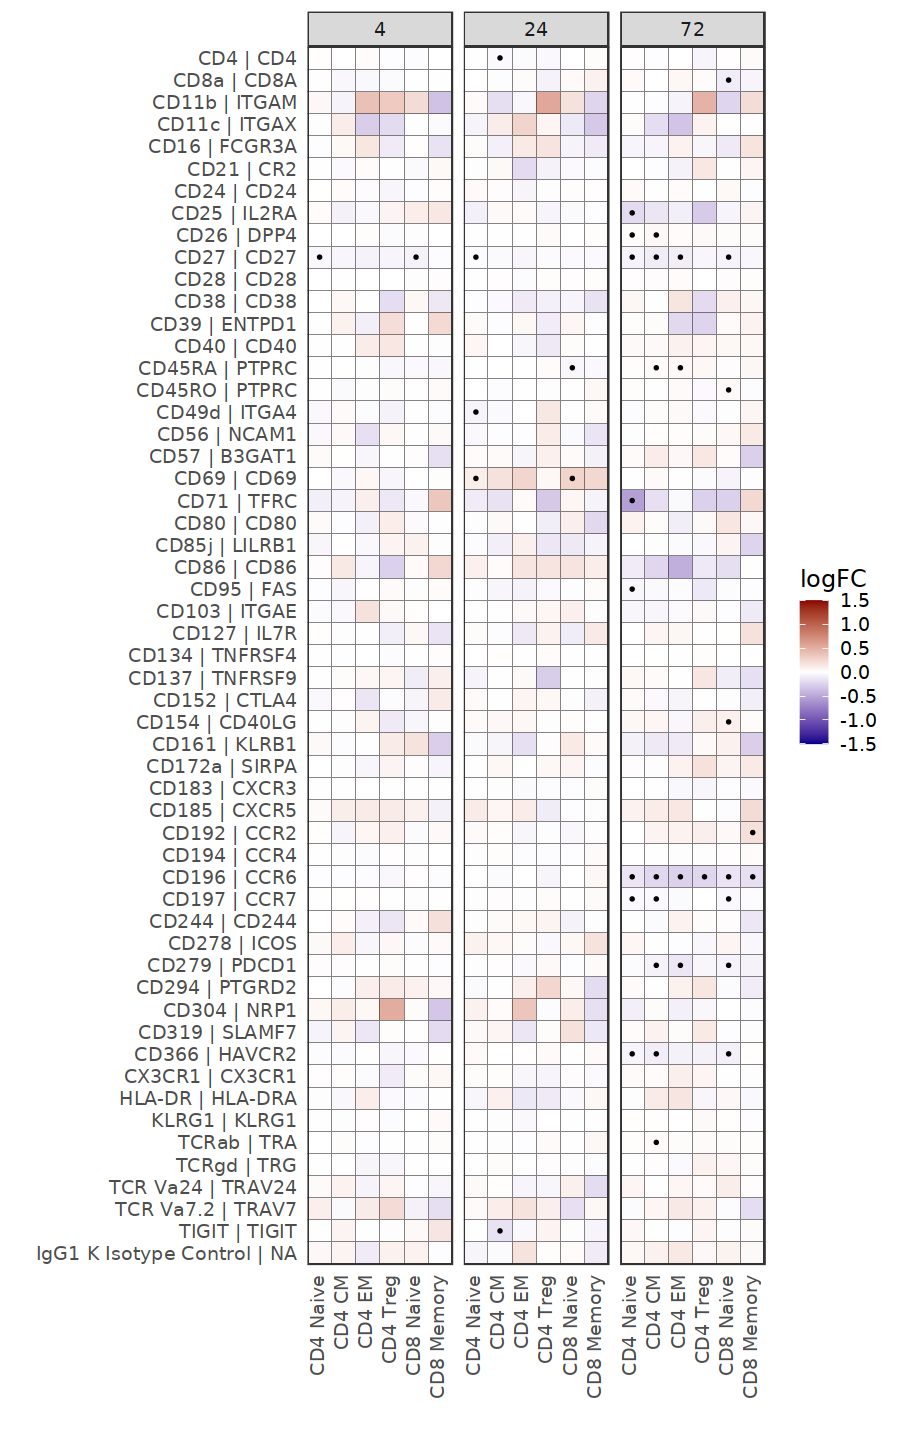

In [14]:
options(repr.plot.width = 7.5, repr.plot.height = 12)
len_heatmap <- ggplot() +
  geom_tile(
      data = plot_data,
      aes(x = cell_type_xpos,
          y = ypos,
          fill = logFC),
      color = "black"
  ) +
  geom_point(
      data = sig_data,
      aes(x = cell_type_xpos,
          y = ypos),
      size = 0.5
  ) +
  facet_wrap(
      ~ timepoint
  ) +
  scale_x_continuous(
      "",
      breaks = type_colors$cell_type_xpos,
      label = type_colors$cell_type_label,
      expand = c(0,0)
  ) +
  scale_y_continuous(
      "",
      breaks = feat_order$ypos,
      labels = feat_order$plot_label,
      expand = c(0,0)
  ) +
  scale_fill_gradient2(
      low = "darkblue",
      mid = "white",
      high = "darkred",
      midpoint = 0,
      limits = c(-1.5, 1.5)
  ) +
  theme_bw(14) +
  theme(
      axis.ticks = element_blank(),
      axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3)
  )
len_heatmap

In [15]:
len_file <- file.path(out_dir, paste0("len_dde_heatmap_", Sys.Date(), ".pdf"))

ggsave(
    len_file,
    len_heatmap,
    width = 7.5, height = 12
)

### Dexamethasone

In [16]:
treat <- "dexamethasone"
treat_dde <- all_dde %>%
  filter(fg == treat)

In [17]:
plot_data <- treat_dde %>%
  left_join(feat_order) %>%
  left_join(type_colors) %>%
  mutate(logFC = case_when(
      logFC > 1.5 ~ 1.5,
      logFC < -1.5 ~ -1.5,
      TRUE ~ logFC
  ))
sig_data <- plot_data %>%
  filter(adjP < 0.01)

Joining with `by = join_by(feature)`
Joining with `by = join_by(aifi_cell_type)`


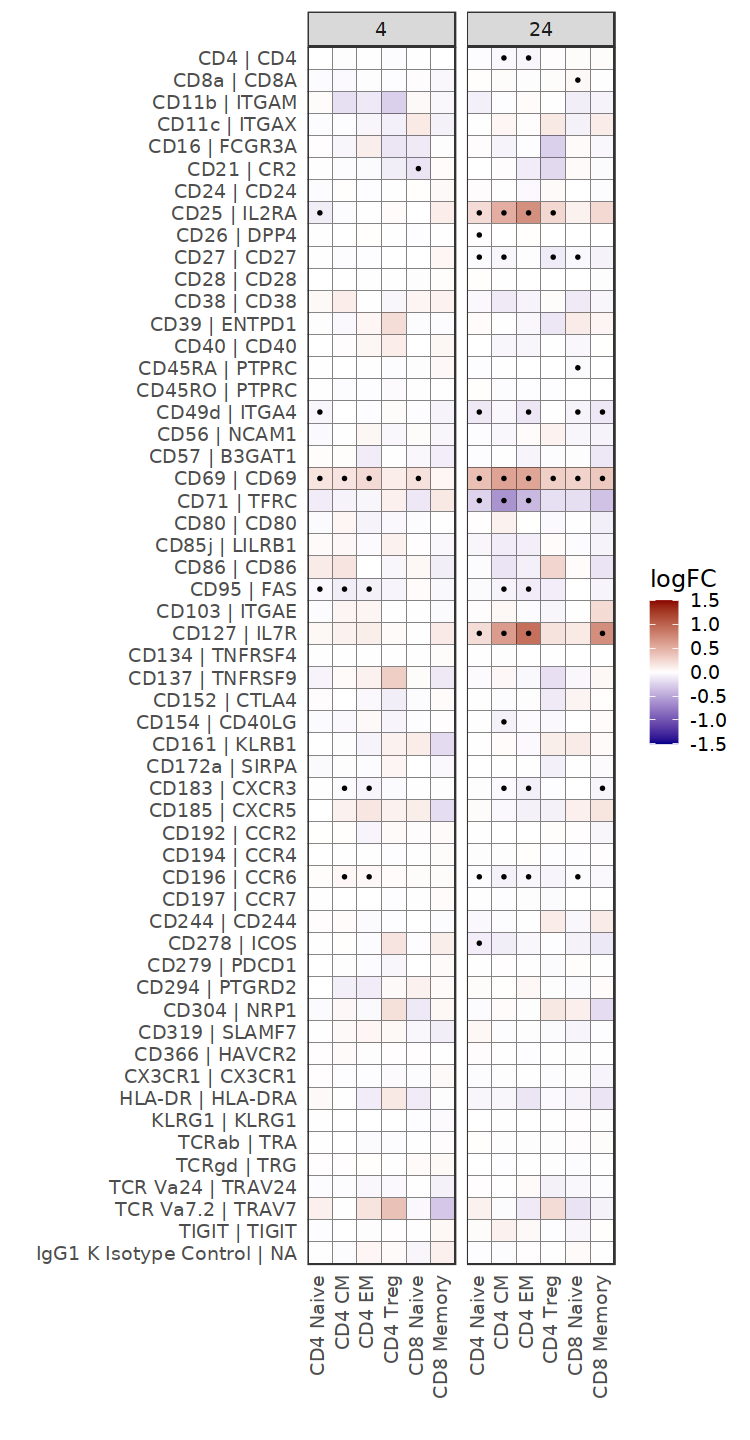

In [18]:
options(repr.plot.width = 6.25, repr.plot.height = 12)
dex_heatmap <- ggplot() +
  geom_tile(
      data = plot_data,
      aes(x = cell_type_xpos,
          y = ypos,
          fill = logFC),
      color = "black"
  ) +
  geom_point(
      data = sig_data,
      aes(x = cell_type_xpos,
          y = ypos),
      size = 0.5
  ) +
  facet_wrap(
      ~ timepoint
  ) +
  scale_x_continuous(
      "",
      breaks = type_colors$cell_type_xpos,
      label = type_colors$cell_type_label,
      expand = c(0,0)
  ) +
  scale_y_continuous(
      "",
      breaks = feat_order$ypos,
      labels = feat_order$plot_label,
      expand = c(0,0)
  ) +
  scale_fill_gradient2(
      low = "darkblue",
      mid = "white",
      high = "darkred",
      midpoint = 0,
      limits = c(-1.5, 1.5)
  ) +
  theme_bw(14) +
  theme(
      axis.ticks = element_blank(),
      axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3)
  )
dex_heatmap

In [19]:
dex_file <- file.path(out_dir, paste0("dex_dde_heatmap_", Sys.Date(), ".pdf"))

ggsave(
    dex_file,
    dex_heatmap,
    width = 6.25, height = 12
)

# Store results in HISE

Finally, we store the output file in our Collaboration Space for later retrieval and use. We need to provide the UUID for our Collaboration Space (aka `studySpaceId`), as well as a title for this step in our analysis process.

The hise function `uploadFiles()` also requires the FileIDs from the original fileset for reference.

In [20]:
study_space_uuid <- "40df6403-29f0-4b45-ab7d-f46d420c422e"
title <- paste("VRd TEA-seq Supp Figure 7", Sys.Date())

In [21]:
out_list <- as.list(c(bor_file, len_file, dex_file))

In [22]:
out_list

[[1]]
[1] "output/supp_figure_07/bor_dde_heatmap_2023-10-28.pdf"

[[2]]
[1] "output/supp_figure_07/len_dde_heatmap_2023-10-28.pdf"

[[3]]
[1] "output/supp_figure_07/dex_dde_heatmap_2023-10-28.pdf"

In [23]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1 ggplot2_3.4.3 dplyr_1.1.3   purrr_1.0.2   hise_2.16.0  

loaded via a namespace (and not attached):
 [1] gtable_0.3.4      jsonlite_1.8.7    compiler_4.3.1    crayon_1.5.2     
 [5] tidyselect_1.2.0  IRdisplay_1.1     bitops_1.0-7      assertthat_0.2.1 
 [9] textshaping_0.3.6 systemfonts_1.0.4 